# EXTRAVAGANZA ML LAB

In [1]:
#The store is my client!

# Importing data from SQL database

In [2]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # to get the password without showing the input
password = getpass.getpass()

········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [4]:
data1 = pd.read_sql_query('SELECT table_query1.customer_id, city, category, number_of_films_rented, total_money_spent, films_rented_may_2005, question FROM query1 as table_query1 LEFT JOIN query2 as table_query2 on table_query1.customer_id = table_query2.customer_id LEFT JOIN query3 as table_query3 on table_query2.customer_id = table_query3.customer_id LEFT JOIN query4 as table_query4 on table_query1.customer_id = table_query4.customer_id LEFT JOIN query5 as table_query5 on table_query1.customer_id = table_query5.customer_id LEFT JOIN sakila.customer as customer_table on table_query1.customer_id = customer_table.customer_id LEFT JOIN sakila.address as address_table on customer_table.address_id = address_table.address_id LEFT JOIN sakila.city as city_table on address_table.city_id = city_table.city_id;', engine)
data1

,customer_id,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
0,1,Sasebo,Classics,1024,3797.76,64.0,YES
1,2,San Bernardino,Sports,729,3475.71,27.0,YES
2,3,Athenai,Action,676,3529.24,52.0,YES
3,4,Myingyan,Horror,484,1799.16,NaN,YES
4,5,Nantou,Classics,1444,5495.56,114.0,YES
...,...,...,...,...,...,...,...
594,595,Jinzhou,Documentary,900,3531.00,30.0,YES
595,596,Patras,Sports,784,2708.16,168.0,YES
596,597,Sullana,Foreign,625,2493.75,50.0,YES
597,598,Lausanne,Drama,484,1843.16,NaN,YES


# Data cleaning

In [5]:
# setting customer_id as index

data1 = data1.set_index('customer_id')

In [6]:
#checking for nulls

data1.isna().sum()

city                       0
category                   0
number_of_films_rented     0
total_money_spent          0
films_rented_may_2005     79
question                   9
dtype: int64

In [7]:
# Filling nulls

data1["question"].fillna("NO", inplace = True) 

In [8]:
data1["films_rented_may_2005"].fillna(0, inplace = True) 

In [9]:
# Making sure that I do not have any more nulls

data1.isna().sum()

city                      0
category                  0
number_of_films_rented    0
total_money_spent         0
films_rented_may_2005     0
question                  0
dtype: int64

In [10]:
data1.dtypes

city                       object
category                   object
number_of_films_rented      int64
total_money_spent         float64
films_rented_may_2005     float64
question                   object
dtype: object

In [11]:
# changing films_rented_may_2005 data type to integer. 

data1["films_rented_may_2005"] = data1["films_rented_may_2005"].apply(lambda x: int((float(x))))

In [12]:
data1.dtypes

city                       object
category                   object
number_of_films_rented      int64
total_money_spent         float64
films_rented_may_2005       int64
question                   object
dtype: object

In [13]:
import numpy as np

In [14]:
# Separating numerical & categorical values

data_num = data1.select_dtypes(np.number)
data_cat = data1.select_dtypes(np.object)

In [15]:
for col in data1.select_dtypes('object'):
    print(data1[col].value_counts(), '\n')

London                   2
Aurora                   2
Munger (Monghyr)         1
Allappuzha (Alleppey)    1
Leshan                   1
                        ..
Bhopal                   1
Bratislava               1
El Alto                  1
Shikarpur                1
Hino                     1
Name: city, Length: 597, dtype: int64 

Sports         62
Sci-Fi         59
Animation      57
Documentary    49
Action         43
Family         39
New            39
Foreign        39
Drama          36
Games          33
Classics       31
Travel         23
Comedy         23
Children       23
Horror         22
Music          21
Name: category, dtype: int64 

YES    590
NO       9
Name: question, dtype: int64 



# EDA

In [16]:
data1.describe()

,number_of_films_rented,total_money_spent,films_rented_may_2005
count,599.000000,599.000000,599.000000
mean,743.831386,3127.713606,53.287145
std,283.229813,1274.733932,43.397876
min,144.000000,634.560000,0.000000
25%,529.000000,2232.700000,25.000000
50%,676.000000,2943.750000,46.000000
75%,900.000000,3800.580000,70.000000
max,2116.000000,9969.750000,320.000000


In [17]:
# checking data correlations

data_corr = data1.corr(method='spearman')
data_corr

,number_of_films_rented,total_money_spent,films_rented_may_2005
number_of_films_rented,1.000000,0.957159,0.424372
total_money_spent,0.957159,1.000000,0.411350
films_rented_may_2005,0.424372,0.411350,1.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

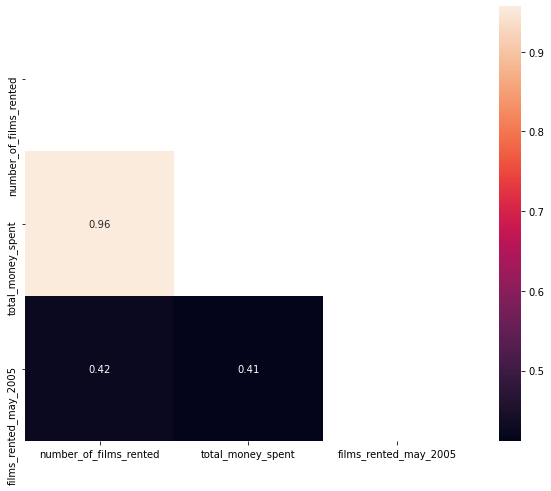

In [19]:
mask = np.zeros_like(data_corr)

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data_corr, mask=mask, annot=True)
plt.show()

/Users/pol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


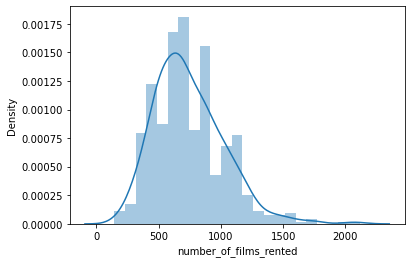

/Users/pol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


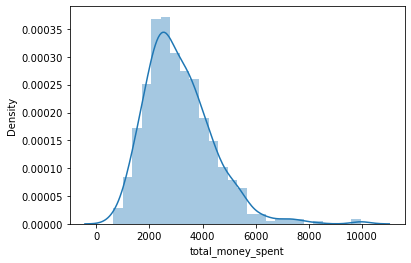

/Users/pol/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


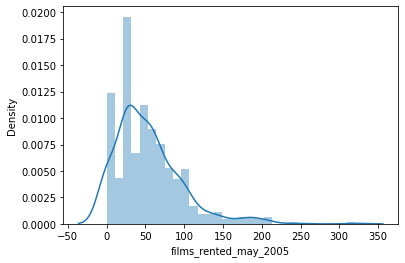

In [20]:
for column in data_num.columns:
    sns.distplot(data_num[column])
    plt.show()

<AxesSubplot:>

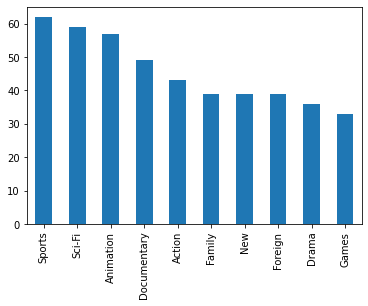

In [21]:
# Film categories...

data1['category'].value_counts().head(10).plot.bar()

<AxesSubplot:>

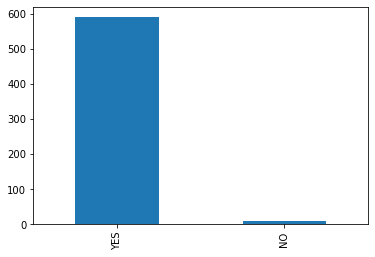

In [22]:
# people that watch a film last month...

data1['question'].value_counts().head(10).plot.bar()

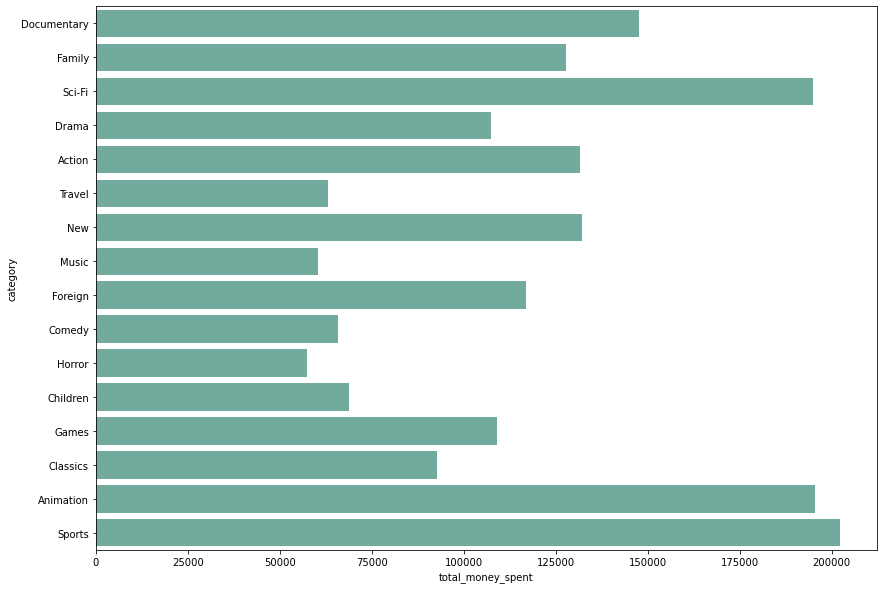

In [23]:
 # relating variables... total money spent per category
    

# Set the figure size
plt.figure(figsize=(14, 10))

# Reorder this data frame - this doesn't work...

data1 = data1.sort_values('total_money_spent').reset_index()

sns.barplot(
    x="total_money_spent", 
    y="category", 
    data=data1, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

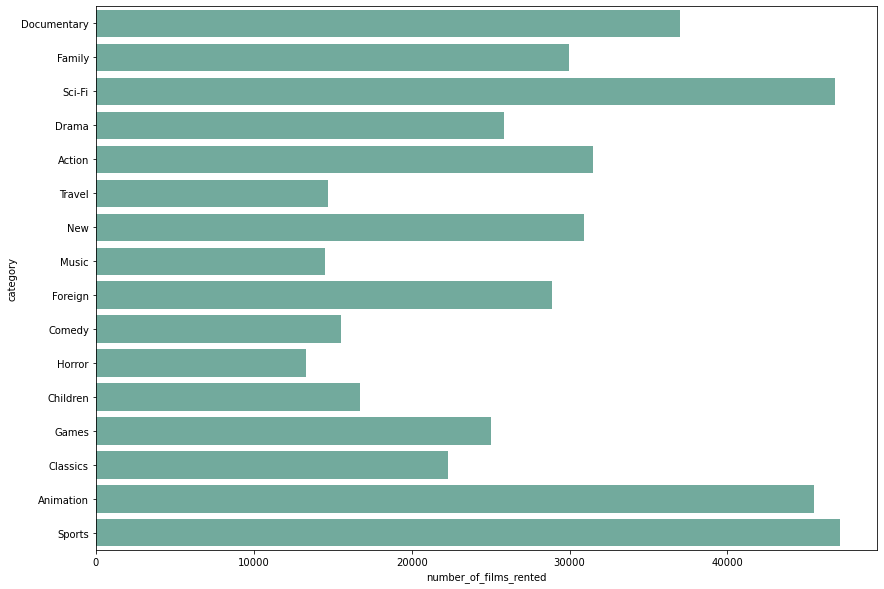

In [24]:

# Set the figure size
plt.figure(figsize=(14, 10))

sns.barplot(
    x="number_of_films_rented", 
    y="category", 
    data=data1, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2'
);

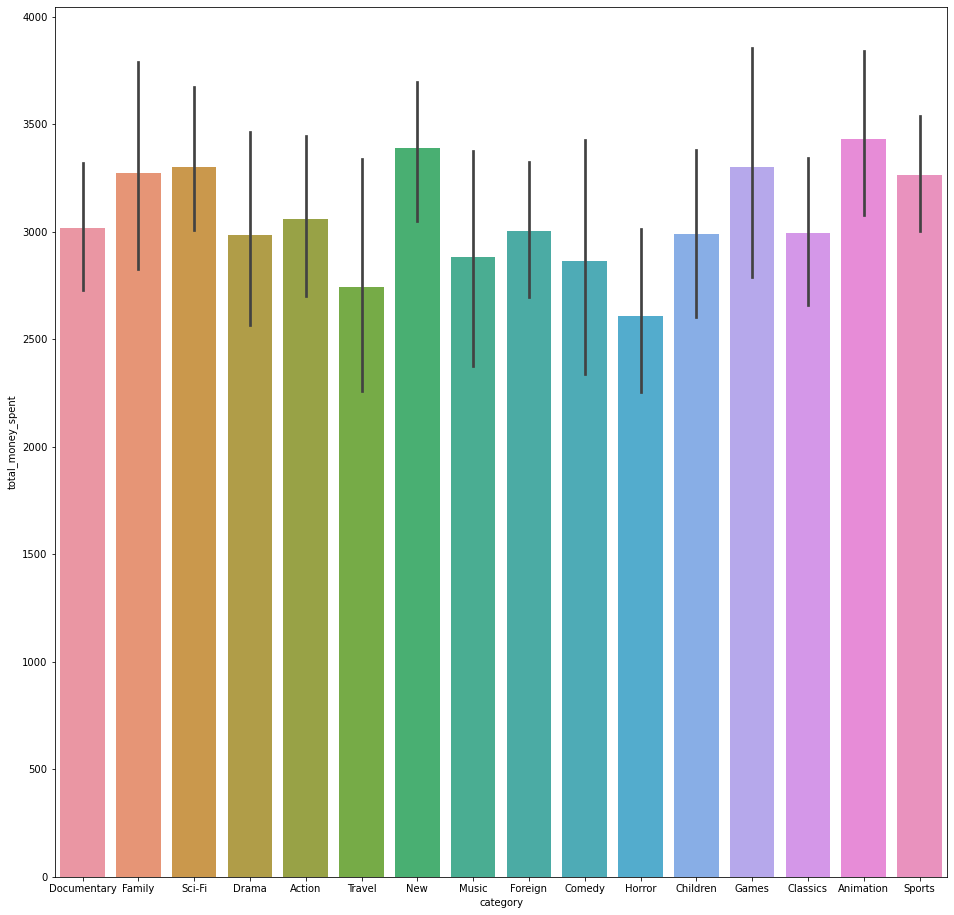

In [25]:
plt.figure(figsize=(16,16))
sns.barplot(x="category", y="total_money_spent", data=data1)
plt.show()

# Feature scaling

# Solving data imbalance

In [26]:
# We proceed to drop city column as the values are really disperse and they add no value to our model (many cities,mostly only one customer per city)

data1 = data1.drop('city', axis=1)

In [27]:
data2 = data1=pd.get_dummies(data1,columns=['category'])
data2

,customer_id,number_of_films_rented,total_money_spent,films_rented_may_2005,question,category_Action,category_Animation,category_Children,category_Classics,category_Comedy,...,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
0,318,144,634.56,12,YES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,281,196,712.04,28,YES,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,248,225,762.75,30,YES,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,61,196,824.04,14,NO,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,110,196,838.04,28,YES,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,178,1521,7589.79,0,YES,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
595,137,1521,7589.79,39,YES,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
596,144,1764,8214.36,84,YES,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
597,148,2116,9960.84,46,YES,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# SMOTE - we use an upsampling method as the data base is too small and we do not want to lose too much info.

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = data2.drop('question', axis=1)
y = data2['question']

X,y = smote.fit_resample(X, y)
y.value_counts()

YES    590
NO     590
Name: question, dtype: int64

# Running the model

In [29]:
# Train / Test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# We train the model

from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

# Evaluating the model

In [31]:
classification.score(X_test, y_test)

0.961864406779661

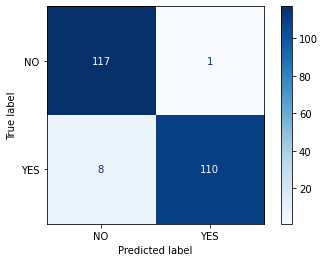

In [32]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()

In [33]:
from sklearn import metrics

predictions = classification.predict(X_test)
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

          NO       0.94      0.99      0.96       118
         YES       0.99      0.93      0.96       118

    accuracy                           0.96       236
   macro avg       0.96      0.96      0.96       236
weighted avg       0.96      0.96      0.96       236

